<a href="https://colab.research.google.com/github/AbdullahKD/MLassignment/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.datasets import load_wine

# Load the Wine dataset
data = load_wine()
print(data.DESCR)


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

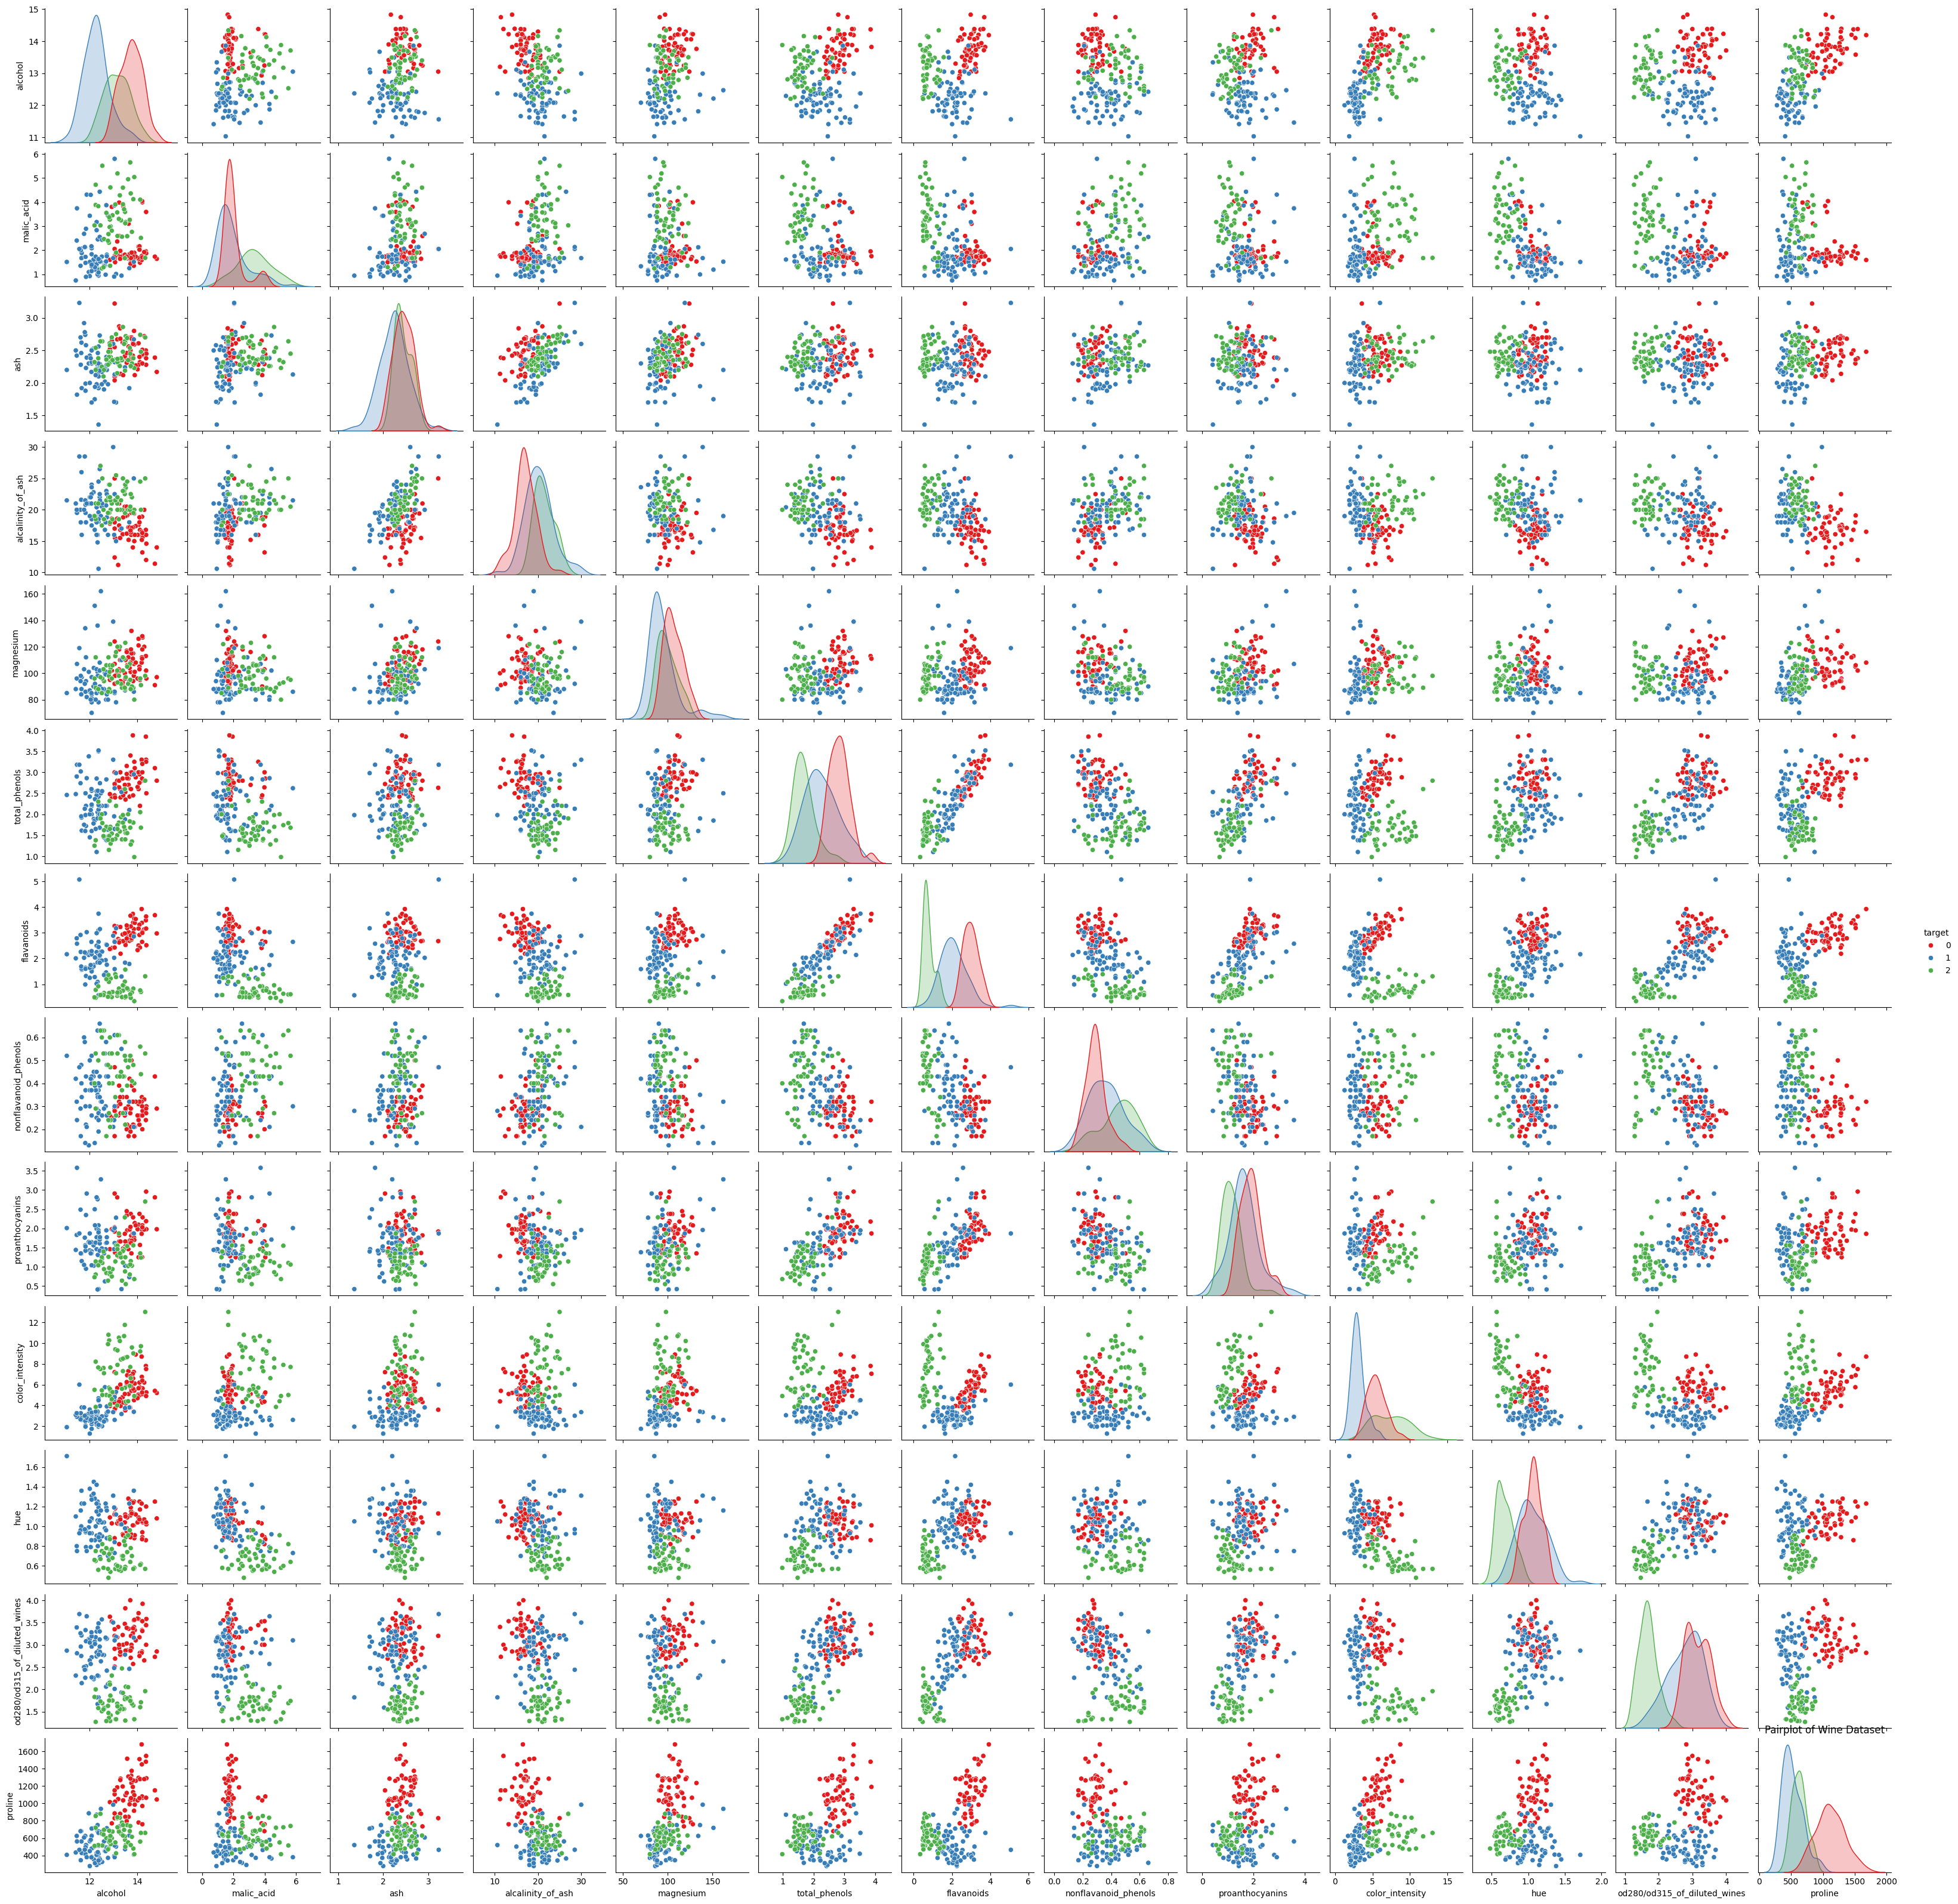

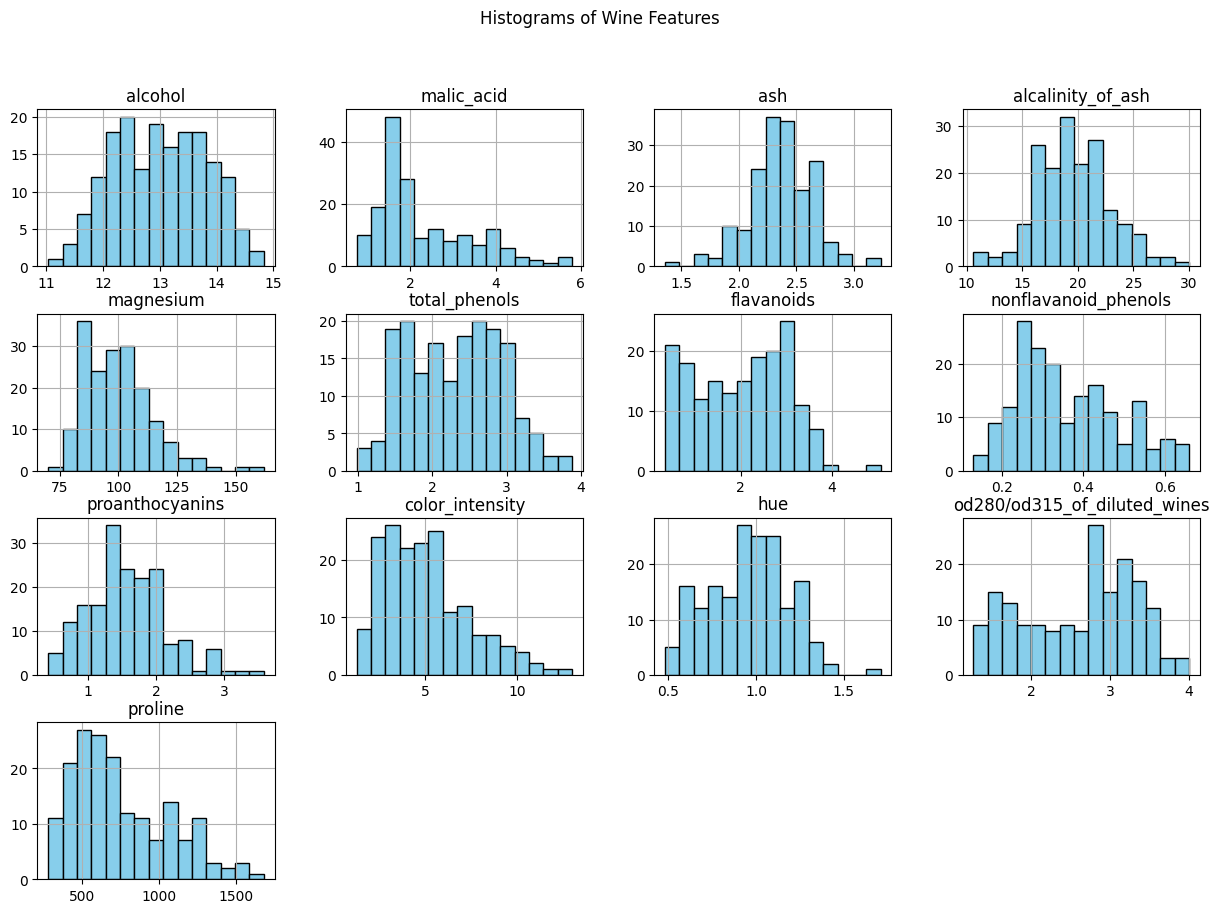

In [5]:
# Create a DataFrame for easier visualization
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Visualize the dataset
# Pairplot
sns.pairplot(df, hue='target', palette='Set1')
plt.title('Pairplot of Wine Dataset')
plt.show()

# Histogram of each feature
df.drop('target', axis=1).hist(bins=15, figsize=(15, 10), layout=(4, 4), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Wine Features')
plt.show()

In [6]:
# Split the dataset into training and testing sets (80% train, 20% test)
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Implementation
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

# Decision Tree Implementation
dtree = DecisionTreeClassifier(max_depth=5)  # max depth of 5
dtree.fit(X_train, y_train)
dtree_predictions = dtree.predict(X_test)

# Random Forest Implementation
rf = RandomForestClassifier(n_estimators=100)  # 100 trees
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Evaluate the models
models = {
    "KNN": knn_predictions,
    "Decision Tree": dtree_predictions,
    "Random Forest": rf_predictions
}
for model_name, predictions in models.items():
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("\n")


--- KNN ---
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36

Confusion Matrix:
 [[12  0  2]
 [ 0 11  3]
 [ 2  3  3]]


--- Decision Tree ---
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Confusion Matrix:
 [[13  1  0]
 [ 0 14  

Text(0.5, 0, 'False Positive Rate')

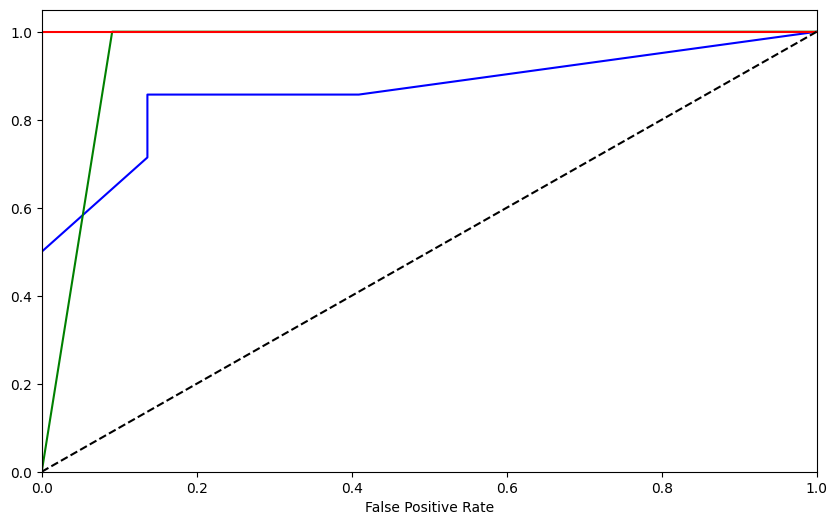

In [7]:

# Get predicted probabilities for the positive class (class 1)
knn_probs = knn.predict_proba(X_test)[:, 1]
dtree_probs = dtree.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs, pos_label=1)
dtree_fpr, dtree_tpr, _ = roc_curve(y_test, dtree_probs, pos_label=1)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs, pos_label=1)

knn_auc = auc(knn_fpr, knn_tpr)
dtree_auc = auc(dtree_fpr, dtree_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(knn_fpr, knn_tpr, color='blue', label='KNN (AUC = {:.2f})'.format(knn_auc))
plt.plot(dtree_fpr, dtree_tpr, color='green', label='Decision Tree (AUC = {:.2f})'.format(dtree_auc))
plt.plot(rf_fpr, rf_tpr, color='red', label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')